In [2]:
from pathlib import Path
#import warnings
import scanpy as sc
#import scib 
import numpy as np
import pandas as pd
import sys 

#import scgpt as scg
import matplotlib.pyplot as plt

plt.style.context('default')
#warnings.simplefilter('ignore', ResourceWarning)



In [4]:
pip import scib

Note: you may need to restart the kernel to use updated packages.


ERROR: unknown command "import"



In [3]:
from pathlib import Path
print(Path.cwd())  # Check current working directory
print(list(Path.cwd().glob('*')))  # List all files in current directory

pd.set_option('display.max_rows', 1000)
import sys
from pathlib import Path

repo_dir = Path.cwd().parent.absolute()
sys.path.append(str(repo_dir))

data_dir = repo_dir / "data"
print(f"repo_dir: {repo_dir}")
print(f"data_dir: {data_dir}")
print(f"sys.path: {sys.path}")


c:\Users\annel\OneDrive\Documenten\Machine Learning\scGPT\notebooks
[WindowsPath('c:/Users/annel/OneDrive/Documenten/Machine Learning/scGPT/notebooks/CellEmbed_1.ipynb'), WindowsPath('c:/Users/annel/OneDrive/Documenten/Machine Learning/scGPT/notebooks/CellEmbed_Pancreas copy.ipynb'), WindowsPath('c:/Users/annel/OneDrive/Documenten/Machine Learning/scGPT/notebooks/CellEmbed_Pancreas.ipynb'), WindowsPath('c:/Users/annel/OneDrive/Documenten/Machine Learning/scGPT/notebooks/chunks'), WindowsPath('c:/Users/annel/OneDrive/Documenten/Machine Learning/scGPT/notebooks/create_notebook.py'), WindowsPath('c:/Users/annel/OneDrive/Documenten/Machine Learning/scGPT/notebooks/data'), WindowsPath('c:/Users/annel/OneDrive/Documenten/Machine Learning/scGPT/notebooks/Dataloader copy.ipynb'), WindowsPath('c:/Users/annel/OneDrive/Documenten/Machine Learning/scGPT/notebooks/Dataloader.ipynb'), WindowsPath('c:/Users/annel/OneDrive/Documenten/Machine Learning/scGPT/notebooks/Dataloader.py'), WindowsPath('c:/Us

In [4]:
Embed_File_Path = Path(r"C:\Users\annel\OneDrive\Documenten\Machine Learning\scGPT\Stromal_cells_all_non-immune_cells_embedded.h5ad")
print (Embed_File_Path)


adata_embed = sc.read(Embed_File_Path)

print(adata_embed)

#Create a dataframe from the scGPT embeddings
embeddings_df = pd.DataFrame(adata_embed.obsm["X_scGPT"])

# Display the first few rows

print("\nFirst few rows of scGPT embeddings:")
print(embeddings_df.head())




C:\Users\annel\OneDrive\Documenten\Machine Learning\scGPT\Stromal_cells_all_non-immune_cells_embedded.h5ad
AnnData object with n_obs × n_vars = 61525 × 24256
    obs: 'mapped_reference_annotation', 'donor_id', 'self_reported_ethnicity_ontology_term_id', 'donor_living_at_sample_collection', 'organism_ontology_term_id', 'sample_uuid', 'sample_preservation_method', 'tissue_ontology_term_id', 'development_stage_ontology_term_id', 'sample_derivation_process', 'tissue_type', 'suspension_derivation_process', 'suspension_uuid', 'suspension_type', 'library_uuid', 'assay_ontology_term_id', 'is_primary_data', 'cell_type_ontology_term_id', 'author_cell_type', 'disease_ontology_term_id', 'sex_ontology_term_id', 'nCount_RNA', 'nFeature_RNA', 'percent.mito', 'nucleosome_signal', 'TSS.enrichment', 'onset', 'duration', 'lateralization', 'histological_assessment', 'cell_type', 'assay', 'disease', 'organism', 'sex', 'tissue', 'self_reported_ethnicity', 'development_stage', 'observation_joinid'
    var: '

In [4]:
from my_src.my_utils import check_annotation_keys

found_keys = check_annotation_keys(adata_embed)

print(found_keys)




Checking cell type annotations in .obs:

✓ Found 'cell_type' with 15 unique values
Examples:
  1. L2/3 intratelencephalic projecting glutamatergic neuron
  2. endothelial cell
  3. glutamatergic neuron
  4. astrocyte
  5. pvalb GABAergic cortical interneuron
Top counts:
  oligodendrocyte: 17108 cells
  glutamatergic neuron: 8984 cells
  L2/3 intratelencephalic projecting glutamatergic neuron: 8686 cells
  astrocyte: 5347 cells
  microglial cell: 4674 cells

Checking gene annotations in .var:

✓ Found 'feature_name' with 24256 unique values
Examples:
  1. MIR1302-2HG
  2. FAM138A
  3. OR4F5
  4. OR4F29
  5. OR4F16

Checking highly variable gene annotations in .var:

⚠️ No HVG annotations found in .var columns

Checking additional metadata:
Available .uns keys: ['citation', 'default_embedding', 'schema_reference', 'schema_version', 'title']
Available .layers: []
{'cell_type_keys': ['cell_type'], 'gene_keys': ['feature_name'], 'hvg_keys': []}


In [5]:
cell_type_key = found_keys['cell_type_keys'][0]

print(f"Using cell type key: {cell_type_key}")





Using cell type key: cell_type


In [6]:
# Randomly split the data into reference and query sets (80% reference, 20% query)
#np.random.seed(42)  # For reproducibility
mask = np.random.rand(len(adata_embed)) < 0.8

# Create a column indicating whether each cell is from reference or query set
adata_embed.obs["is_ref"] = ["Reference" if m else "Query" for m in mask]
adata_embed.obs["is_ref"] = adata_embed.obs["is_ref"].astype("category")

# Create reference and query datasets
adata_ref = adata_embed[mask].copy()
adata_query = adata_embed[~mask].copy()

print(f"Reference dataset shape: {adata_ref.shape}")
print(f"Query dataset shape: {adata_query.shape}")

#mask the query dataset
adata_query.obs["is_ref"] = "Query"

#mask the query dataset in adata_embed
adata_embed.obs["cell_type"] = adata_embed.obs["cell_type"].astype("category")
adata_embed.obs["cell_type"] = adata_embed.obs["cell_type"].cat.add_categories("To be predicted")
adata_embed.obs.loc[adata_embed.obs["is_ref"] == "Query", "cell_type"] = "To be predicted"


Reference dataset shape: (49183, 24256)
Query dataset shape: (12342, 24256)


# Visualize the embeddings

In [7]:
import scanpy as sc


c:\Users\annel\anaconda3\envs\Imagemaker\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


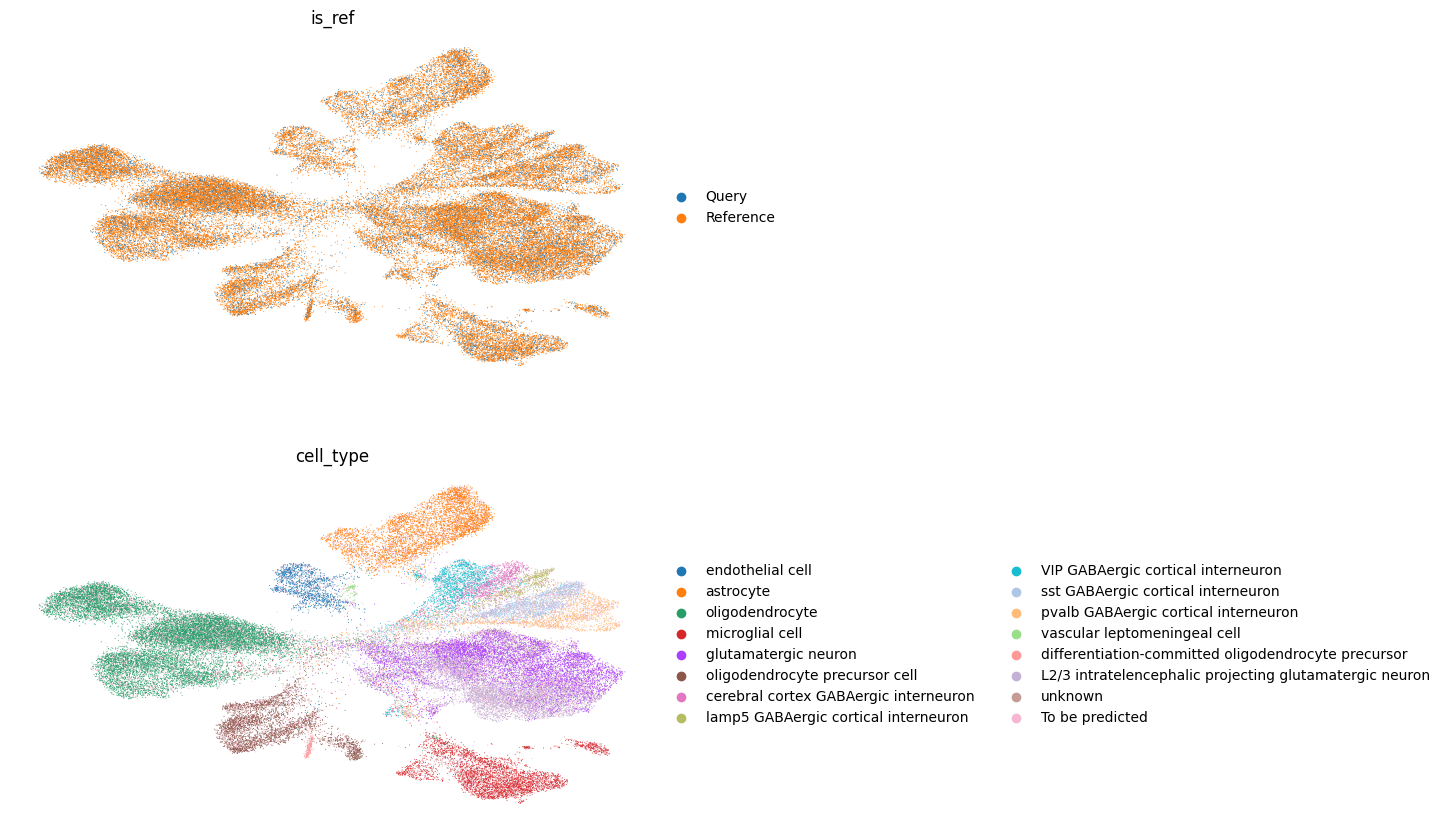

In [8]:
sc.pp.neighbors(adata_embed, use_rep="X_scGPT")
sc.tl.umap(adata_embed)
sc.pl.umap(
    adata_embed, color=["is_ref", cell_type_key], wspace=0.4, frameon=False, ncols=1
)


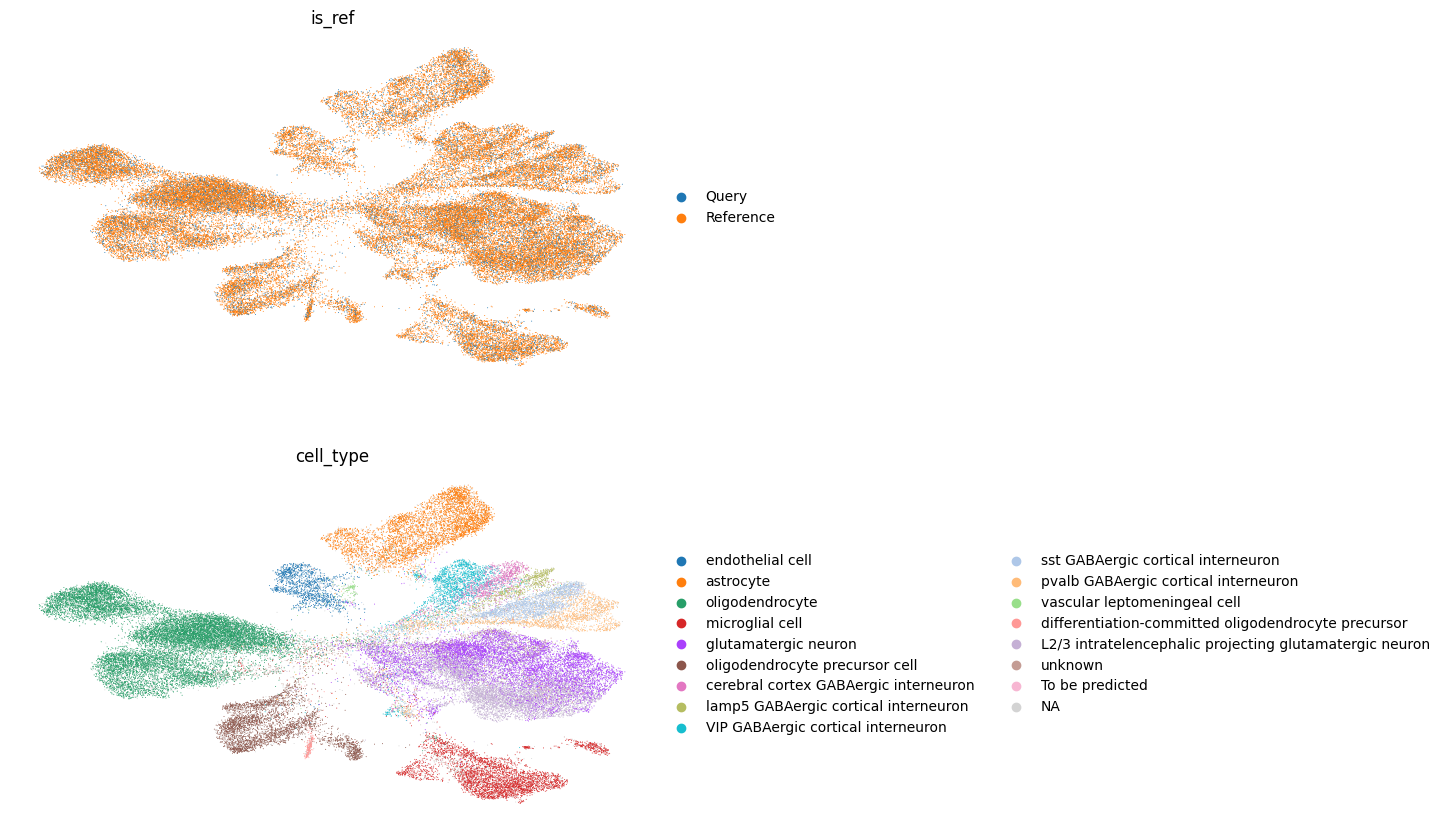

In [9]:
# Temporarily store the query cells' types
temp_types = adata_embed.obs["cell_type"].copy()

# For visualization, set query cells to NA (which will show as grey by default)
adata_embed.obs.loc[adata_embed.obs["is_ref"] == "Query", "cell_type"] = None

# Create the plot
sc.pl.umap(
    adata_embed, 
    color=["is_ref", "cell_type"], 
    wspace=0.4, 
    frameon=False, 
    ncols=1
)

# Restore the original cell types
adata_embed.obs["cell_type"] = temp_types

In [10]:
# Get embeddings for reference cells only
ref_embeddings = adata_embed.obsm["X_scGPT"][adata_embed.obs["is_ref"] == "Reference"]
query_embeddings = adata_embed.obsm["X_scGPT"][adata_embed.obs["is_ref"] == "Query"]

In [11]:
# Those functions are only used when faiss is not installed
def l2_sim(a, b):
    sims = -np.linalg.norm(a - b, axis=1)
    return sims

def get_similar_vectors(vector, ref, top_k=10):
        # sims = cos_sim(vector, ref)
        sims = l2_sim(vector, ref)
        
        top_k_idx = np.argsort(sims)[::-1][:top_k]
        return top_k_idx, sims[top_k_idx]

In [20]:
# amount of nearest neighbors
k = 10

# Get nearest neighbors for each query cell
nn_idx = []
nn_sim = []

# Process each query embedding individually against the reference set
for query in query_embeddings:
    # Reshape query to match expected dimensions (1, 512)
    query_reshaped = query.reshape(1, -1)
    # Get nearest neighbors for this query
    idx, sim = get_similar_vectors(query_reshaped, ref_embeddings, k)
    nn_idx.append(idx)
    nn_sim.append(sim)

# Convert lists to numpy arrays
nn_idx = np.array(nn_idx)
nn_sim = np.array(nn_sim)



KeyboardInterrupt: 

In [12]:
# Batch version if memory is an issue
k = 10
batch_size = 5

nn_idx = []
nn_sim = []

# Normalize reference embeddings once
ref_norms = np.linalg.norm(ref_embeddings, axis=1, keepdims=True)
ref_normalized = ref_embeddings / ref_norms

for i in range(0, len(query_embeddings), batch_size):
    batch = query_embeddings[i:i + batch_size]
    
    # Normalize batch
    batch_norms = np.linalg.norm(batch, axis=1, keepdims=True)
    batch_normalized = batch / batch_norms
    
    # Compute similarities for this batch
    batch_similarities = np.dot(batch_normalized, ref_normalized.T)
    
    # Get top k for this batch
    batch_idx = np.argsort(-batch_similarities, axis=1)[:, :k]
    batch_sim = np.take_along_axis(batch_similarities, batch_idx, axis=1)
    
    nn_idx.append(batch_idx)
    nn_sim.append(batch_sim)

# Concatenate results
nn_idx = np.concatenate(nn_idx, axis=0)
nn_sim = np.concatenate(nn_sim, axis=0)

In [13]:
from sklearn.neighbors import NearestNeighbors

# Initialize and fit the nearest neighbors model
nn = NearestNeighbors(n_neighbors=10)  # k=10 nearest neighbors
nn.fit(ref_embeddings)

# Find k nearest neighbors for all test embeddings at once
distances, labels = nn.kneighbors(query_embeddings) 

# Get predictions using the same logic as before
preds = []
for k in range(query_embeddings.shape[0]):
    # Get cell types of nearest neighbors and find most common
    pred = adata_ref.obs[cell_type_key][labels[k]].value_counts()
    preds.append(pred.index[0])



gt = adata_query.obs[cell_type_key].to_numpy()

C:\Users\annel\AppData\Local\Temp\ipykernel_33564\3899343715.py:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  pred = adata_ref.obs[cell_type_key][labels[k]].value_counts()
C:\Users\annel\AppData\Local\Temp\ipykernel_33564\3899343715.py:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  pred = adata_ref.obs[cell_type_key][labels[k]].value_counts()
C:\Users\annel\AppData\Local\Temp\ipykernel_33564\3899343715.py:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by po

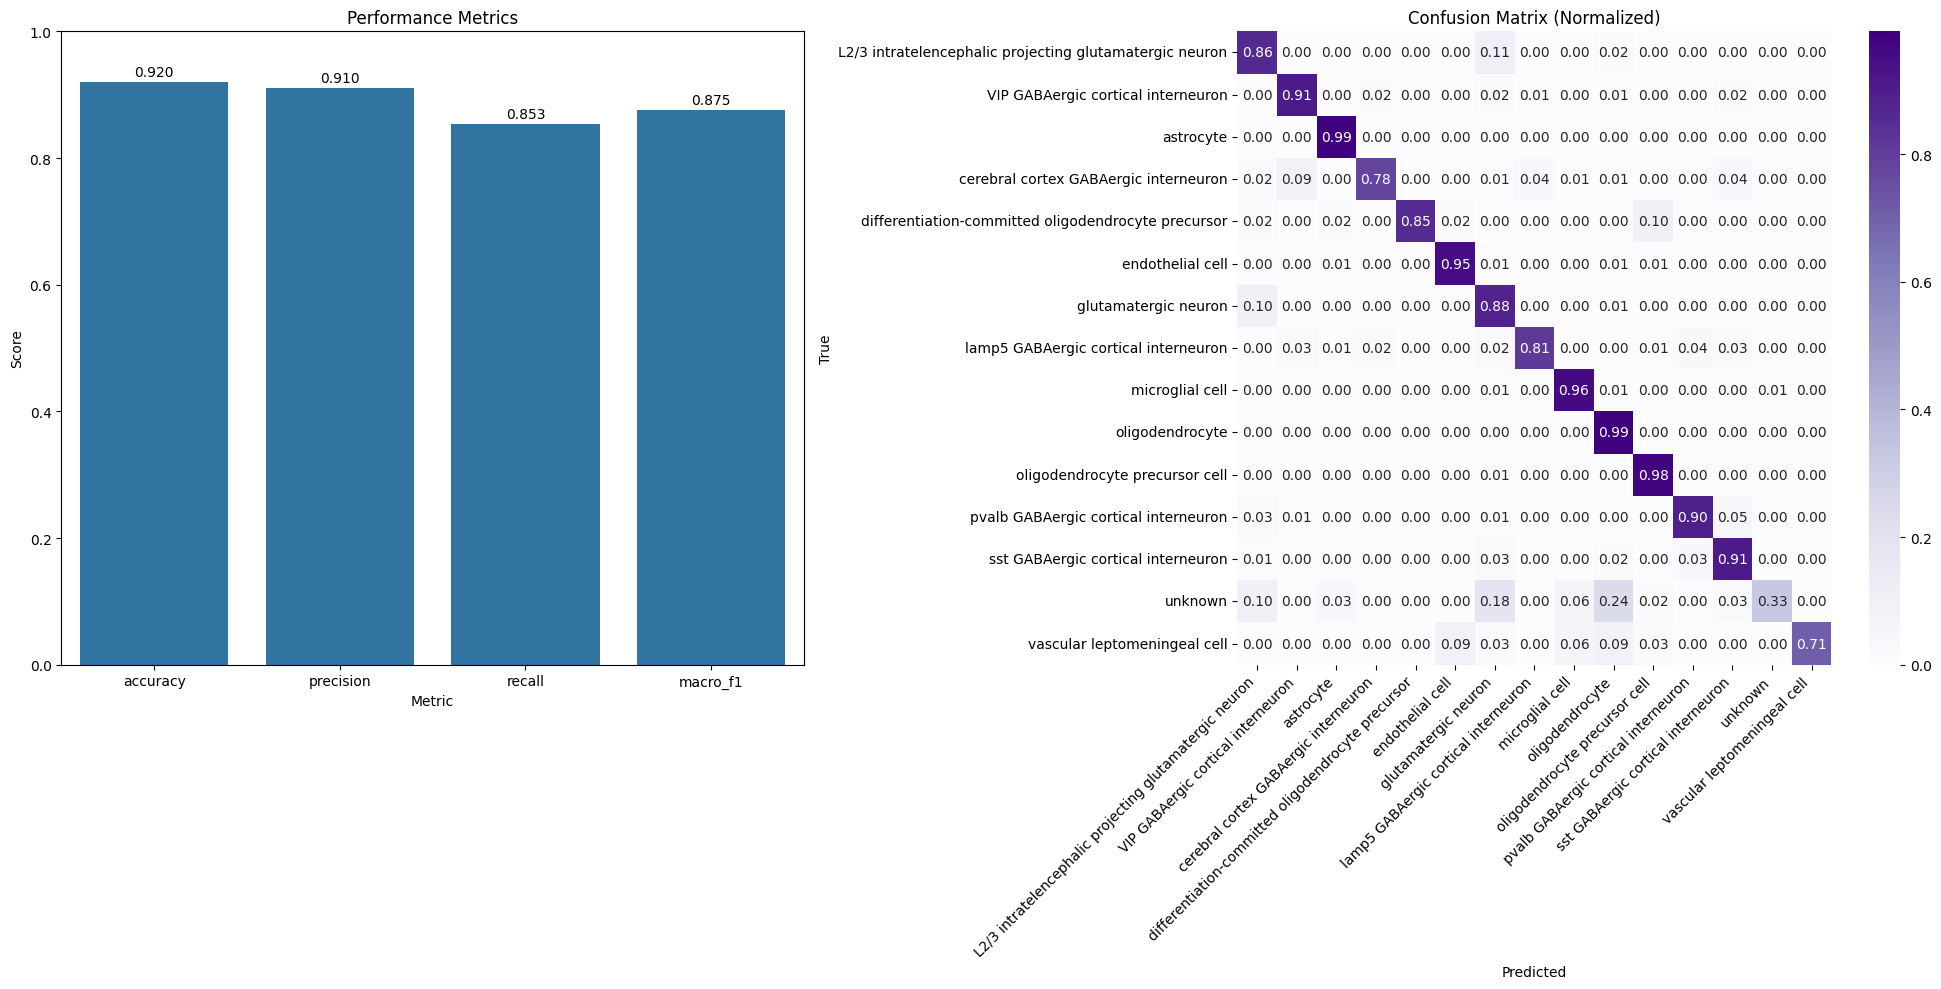


Detailed Performance Metrics:
accuracy: 0.920
precision: 0.910
recall: 0.853
macro_f1: 0.875


In [14]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# First, let's calculate and display the performance metrics
res_dict = {
    "accuracy": accuracy_score(gt, preds),
    "precision": precision_score(gt, preds, average="macro"),
    "recall": recall_score(gt, preds, average="macro"),
    "macro_f1": f1_score(gt, preds, average="macro"),
}

# Create a figure with two subplots - one for metrics, one for confusion matrix
fig = plt.figure(figsize=(20, 10))

# Left subplot for metrics
ax1 = plt.subplot(121)
metrics_df = pd.DataFrame(list(res_dict.items()), columns=['Metric', 'Score'])
sns.barplot(x='Metric', y='Score', data=metrics_df, ax=ax1)
ax1.set_title('Performance Metrics')
ax1.set_ylim(0, 1)  # Set y-axis from 0 to 1
for i, v in enumerate(metrics_df['Score']):
    ax1.text(i, v + 0.01, f'{v:.3f}', ha='center')  # Add value labels

# Right subplot for confusion matrix
ax2 = plt.subplot(122)
cell_type_list = np.unique(gt)
matrix = confusion_matrix(gt, preds, labels=cell_type_list)
matrix = matrix.astype("float") / matrix.sum(axis=1)[:, np.newaxis]

# Create confusion matrix heatmap
df = pd.DataFrame(matrix, 
                 index=cell_type_list[:matrix.shape[0]], 
                 columns=cell_type_list[:matrix.shape[1]])
sns.heatmap(df, 
            cmap='Purples',
            annot=True,
            fmt=".2f",
            cbar=True,
            ax=ax2)

ax2.set_title('Confusion Matrix (Normalized)')
ax2.set_xlabel('Predicted')
ax2.set_ylabel('True')

# Rotate x-axis labels for better readability
plt.setp(ax2.get_xticklabels(), rotation=45, ha='right')
plt.setp(ax2.get_yticklabels(), rotation=0)

plt.tight_layout()
plt.show()

# Print detailed metrics
print("\nDetailed Performance Metrics:")
for metric, value in res_dict.items():
    print(f"{metric}: {value:.3f}")

In [15]:
# First convert our predictions and ground truth to numpy arrays to ensure consistent handling
gt_array = np.array(gt)
preds_array = np.array(preds)

# Create a summary DataFrame showing predictions vs true labels
summary_df = pd.DataFrame({
    'True_Label': gt_array,
    'Predicted_Label': preds_array
})

# Get basic counts of predictions
print("\nDetailed counts of predictions:")
prediction_counts = pd.crosstab(
    summary_df['True_Label'], 
    summary_df['Predicted_Label'], 
    margins=True
)
print(prediction_counts)

# Now let's analyze each cell type's predictions
print("\nDetailed analysis per cell type:")
for cell_type in np.unique(gt_array):
    # Create boolean mask for this cell type
    mask = gt_array == cell_type
    total = np.sum(mask)
    correct = np.sum((preds_array[mask] == cell_type))
    
    print(f"\nCell type: {cell_type}")
    print(f"Total cells: {total}")
    print(f"Correctly predicted: {correct} ({(correct/total*100):.1f}%)")
    
    if correct < total:
        print("Misclassified as:")
        # Get all predictions for this cell type
        wrong_predictions = preds_array[mask & (preds_array != cell_type)]
        # Count unique values
        unique, counts = np.unique(wrong_predictions, return_counts=True)
        for pred, count in zip(unique, counts):
            print(f"  {pred}: {count} cells ({(count/total*100):.1f}%)")


Detailed counts of predictions:
Predicted_Label                                     L2/3 intratelencephalic projecting glutamatergic neuron  \
True_Label                                                                                                    
L2/3 intratelencephalic projecting glutamatergi...                                               1540         
VIP GABAergic cortical interneuron                                                                  2         
astrocyte                                                                                           4         
cerebral cortex GABAergic interneuron                                                               5         
differentiation-committed oligodendrocyte precu...                                                  1         
endothelial cell                                                                                    0         
glutamatergic neuron                                                           